In [1]:
import keras
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train = x_train/255.0
x_test = x_test/255.0

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def retornar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size):
    loss_train = list(); loss_test = list(); acc_train = list(); acc_test = list()
    for i in range(epochs):
        modelo.fit(x_train, y_train, batch_size=batch_size, epochs=1, verbose=1, validation_data=(x_test, y_test))
        aux_train = modelo.evaluate(x_train, y_train, verbose=0)
        aux_test = modelo.evaluate(x_test, y_test, verbose = 0)
        loss_train.append(aux_train[0]); acc_train.append(aux_train[1])
        loss_test.append(aux_test[0]); acc_test.append(aux_test[1])
    return(loss_train, loss_test, acc_train, acc_test)

def graficar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size):
    loss_train, loss_test, acc_train, acc_test = retornar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size)
    epl = list(range(1, epochs+1))
    fig = plt.figure(figsize = (12,4))
    plt.plot(epl, loss_train, '-', label='loss train')
    plt.plot(epl, loss_test, '-', label='loss test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs epoch')
    plt.show()
    fig = plt.figure(figsize = (12,4))
    plt.plot(epl, acc_train, '-', label='acc train')
    plt.plot(epl, acc_test, '-', label='acc test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs epoch')
    plt.show()
            
def subplot_loss(epochs, ns, distribucion, nombres, subs):
    epl = list(1, range(epochs+1))
    fig = plt.figure(figsize=(18,8))
    for i in range(ns):
        aux = subs[i]
        plt.subplot(distribucion+i)
        plt.title(nombres[i])
        plt.plot(epl, aux[0], '-g')
        plt.plot(epl, aux[1], '-r')
    blue_line = mlines.Line2D([], [], color='g')
    reds_line = mlines.Line2D([], [], color='r')
    fig.legend((blue_line, reds_line), ('train', 'test'), 'upper right')
    fig.suptitle('Loss vs epoch', fontsize=16)
    plt.show()
    
def subplot_acc(epochs, ns, distribucion, nombres, subs):
    epl = list(1, range(epochs+1))
    fig = plt.figure(figsize=(18,8))
    for i in range(ns):
        aux = subs[i]
        plt.subplot(distribucion+i)
        plt.title(nombres[i])
        plt.plot(epl, aux[2], '-y')
        plt.plot(epl, aux[3], '-b')
    blue_line = mlines.Line2D([], [], color='y')
    reds_line = mlines.Line2D([], [], color='b')
    fig.legend((blue_line, reds_line), ('train', 'test'), 'upper right')
    fig.suptitle('Accuracy vs epoch', fontsize=16)
    plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
#model.summary()

optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
#model.fit(x_train, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s 250us/step

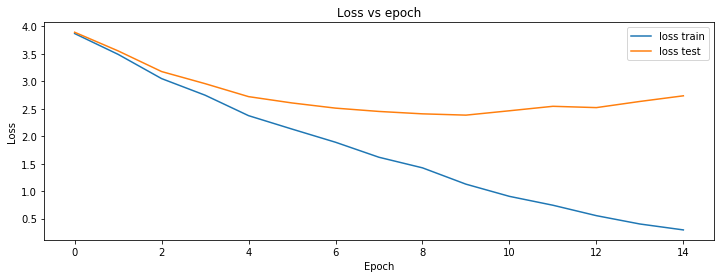

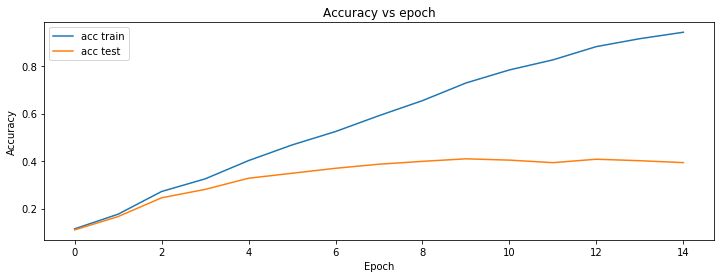

In [101]:
graficar(model, x_train, y_train, x_test, y_test, 15, 128)

In [103]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model1.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model1.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.25))
model1.add(Dense(1024,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model2 = Sequential()
model2.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model2.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model3 = Sequential()
model3.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model3.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model3.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(1024,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model3.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model4 = Sequential()
model4.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model2.add(Dropout(0.25))
model4.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model4.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

In [107]:
sub1 = retornar(model1, x_train, y_train, x_test, y_test, 15, 128)
sub2 = retornar(model1, x_train, y_train, x_test, y_test, 15, 128)
sub3 = retornar(model1, x_train, y_train, x_test, y_test, 15, 128)
sub4 = retornar(model1, x_train, y_train, x_test, y_test, 15, 128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 3s 280us/step

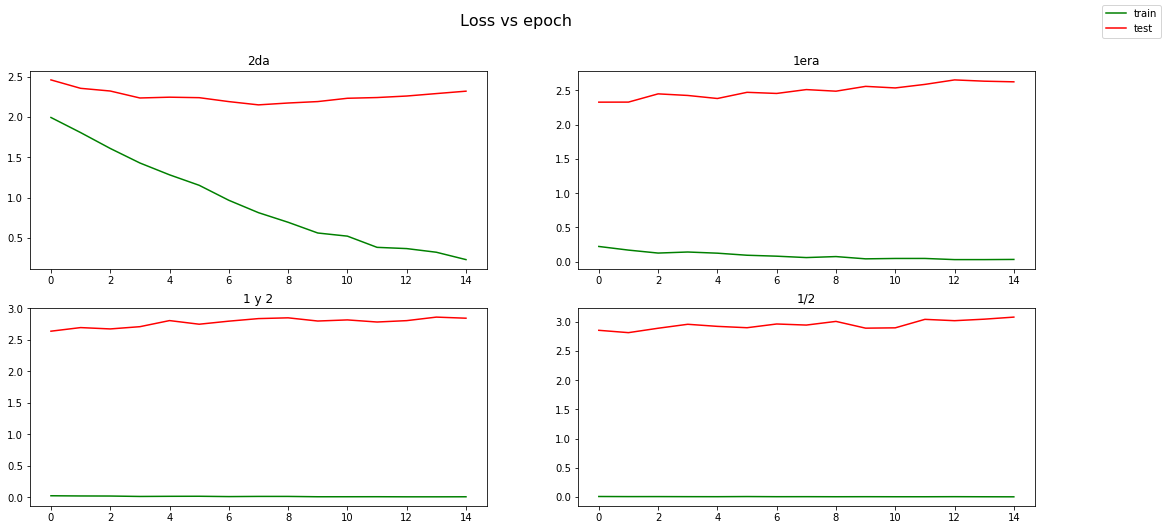

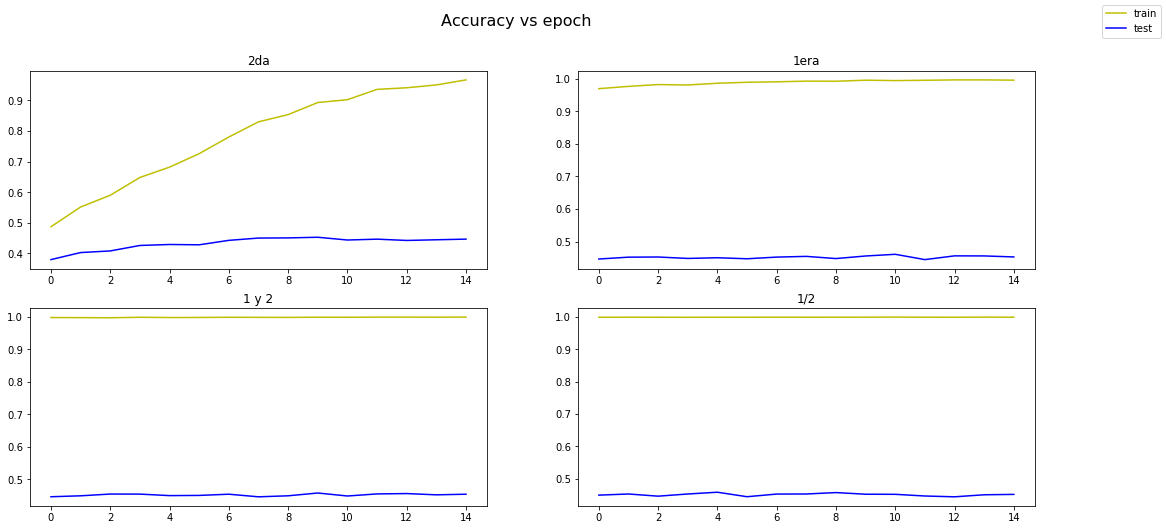

In [112]:
subplot_loss(15, 4, 221, ['2da', '1era', '1 y 2', '1/2'], [sub1, sub2, sub3, sub4])
subplot_acc(15, 4, 221, ['2da', '1era', '1 y 2', '1/2'], [sub1, sub2, sub3, sub4])

In [109]:
import pickle
#with open('T1.P4.b.pickle', 'wb') as handle:
    #pickle.dump(list([sub1, sub2, sub3, sub4]), handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('x_4.pickle', 'rb') as handle:
    x_train, x_val, x_test = pickle.load(handle)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 9)         252       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 3)         246       
Total params: 498
Trainable params: 498
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 224us/step - loss: 1.5491 - val_loss: 1.5469

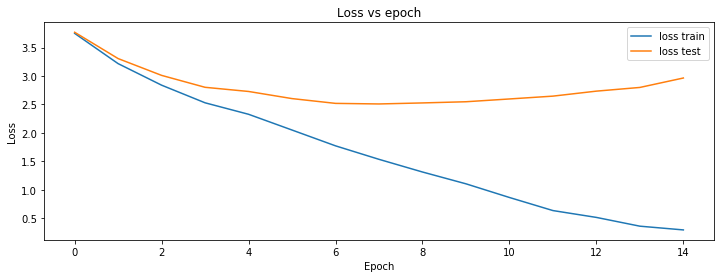

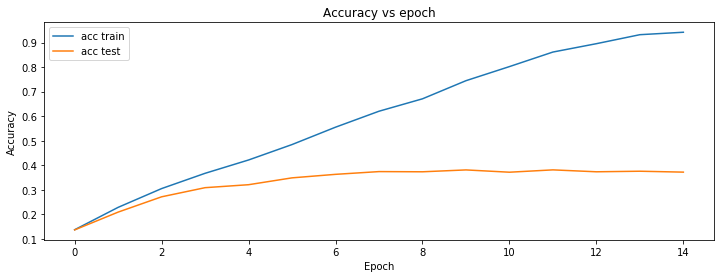

In [8]:
from keras.layers import Input
from keras.models import Model

hidden_layer1 = 9
hidden_layer2 = 3
loss_ = 'categorical_crossentropy'
activation_1 = 'relu'
decoder_activation='softmax'
activation_2 = 'relu'
decoder_activation2 = 'softmax'
###BUILD AUTOENCODER1
input_img = Input(shape=x_train.shape[1:])
encoded1 = Conv2D(hidden_layer1, (3, 3),activation=activation_1,padding='same')(input_img)
decoded1 = Conv2D(3, (3, 3), activation=decoder_activation, padding='same')(encoded1)
autoencoder1 = Model(input_img, decoded1)
autoencoder1.compile(optimizer='adam', loss=loss_)
autoencoder1.summary()
autoencoder1.fit(x_train, x_train, epochs=15, batch_size=128,validation_data=(x_test, x_test))
autoencoder1.save('autoencoder_layer1.h5')
###BUILD AUTOENCODER2
encoded1 = autoencoder1.layers[1](autoencoder1.input)
#AUTOENCODER2
encoded2 = Conv2D(hidden_layer2,(3, 3), activation=activation_2, padding='same')(encoded1) 
decoded2 = Conv2D(hidden_layer1,(3, 3), activation=decoder_activation2,padding='same')(encoded2) 
#finish AUTOENCODER2
decoded1 = autoencoder1.layers[-1](decoded2)
autoencoder2 = Model(autoencoder1.input, decoded1) #all model
#autoencoder1 set fixed
autoencoder2.layers[1].trainable=False
autoencoder2.layers[-1].trainable=False
autoencoder2.compile(optimizer='adam', loss=loss_)
autoencoder2.summary()
autoencoder2.fit(x_train, x_train, epochs=10, batch_size=128,validation_data=(x_test, x_test))
autoencoder2.save('autoencoder_layer2.h5')
#FINE TUNNING
model = Sequential()
model.add(Conv2D(hidden_layer1,(3, 3),padding='same',activation=activation_1,input_shape=x_train.shape[1:]))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Conv2D(hidden_layer2, (3, 3),padding='same',activation=activation_2))
model.layers[-1].set_weights(autoencoder2.layers[2].get_weights())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
#model.fit(x_train, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test, y_test))
graficar(model, x_train, y_train, x_test, y_test, 15, 128)

In [11]:
from keras.applications import VGG16
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
features_train = modelVGG.predict(x_train)
features_test = modelVGG.predict(x_test)
modelVGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 80us/step
Train on 50000 sample

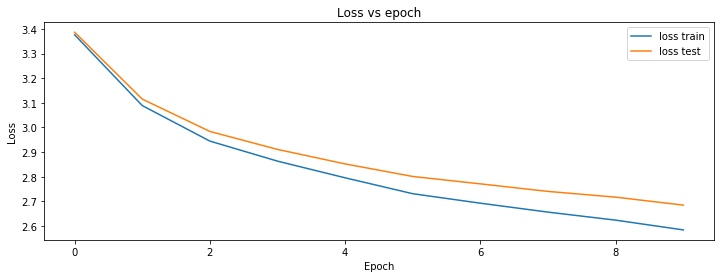

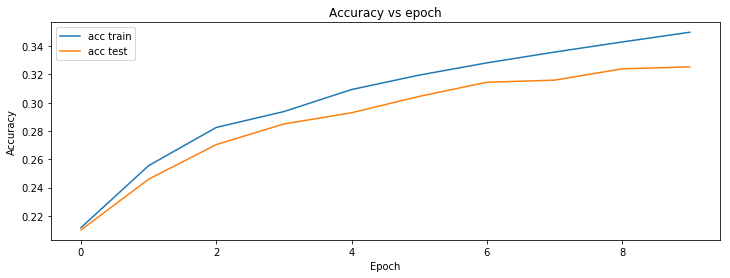

In [14]:
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
graficar(model, features_train, y_train, features_test, y_test, 10, 128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 99us/step

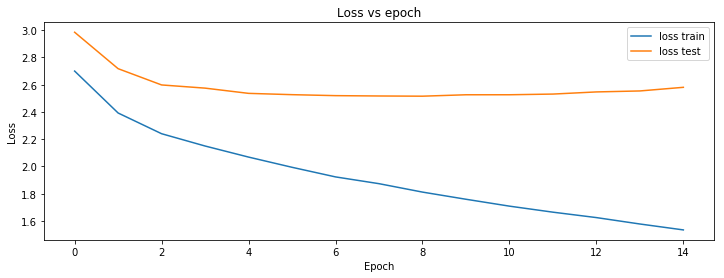

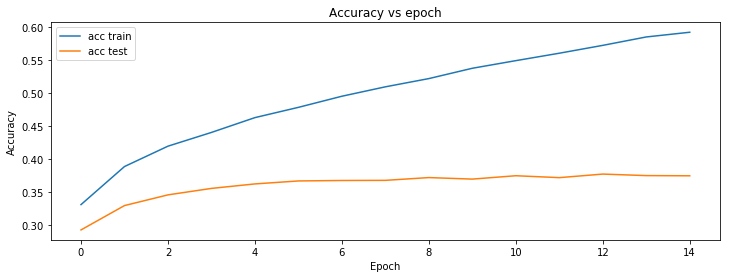

In [19]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
graficar(model, features_train, y_train, features_test, y_test, 15, 128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 30s 604us/step - loss: 3.5320 - acc: 0.2027 - val_loss: 3.9793 - val_acc: 0.2002

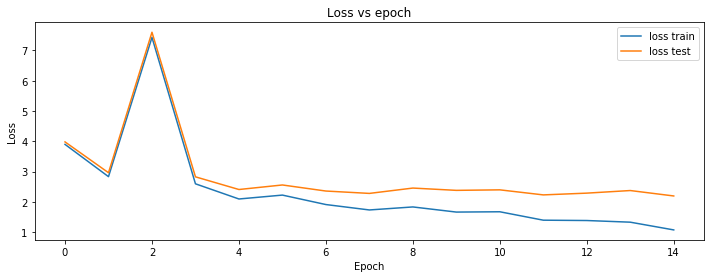

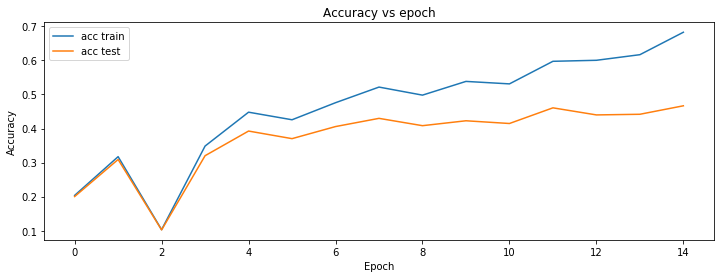

In [4]:
import numpy as np
from keras.applications import VGG16
from keras.layers import BatchNormalization
from keras.layers import Input
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
salida_vgg = modelVGG.get_layer('block4_pool').output_shape
model = Sequential()
model.add(Conv2D(512,(3, 3),input_shape=salida_vgg[1:],activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),strides=(2,2)))    
##dense section
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
#delete last 4 layers of VGG16 and transfer the weight to new model
modelVGG.layers.pop() #delete last maxpooling
for i in np.arange(2,-1,-1):
    last = modelVGG.layers.pop() #delete convolutional layers
    model.layers[i].set_weights(last.get_weights())
from keras.models import Model
crop_modelVGG = Model(inputs=modelVGG.input, outputs=modelVGG.layers[-1].output)
features_train = crop_modelVGG.predict(x_train)
features_test = crop_modelVGG.predict(x_test)
#train it
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(features_train,y_train,epochs=15,batch_size=128,verbose=1,validation_data=(features_test,y_test))
graficar(model, features_train, y_train, features_test, y_test, 15, 128)